<a href="https://colab.research.google.com/github/isnen27/astatine/blob/main/Final_Project_Orion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Dataset

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

#for visualizations
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas import plotting
import matplotlib.style as style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
%matplotlib inline

# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown

# for providing path
import os

# for modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import warnings
import pickle
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Basic Exploration

In [ ]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())
    print('\n')

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))
    print('\n')

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())
    print('\n')

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)
    print('\n')

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)
    print('\n')

    # (f) Numerical features in the dataset
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    if numerical_features:
        display_markdown('Numerical features in the dataset')
        display(numerical_features)
        print('\n')

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_features:
        display_markdown('Categorical features in the dataset')
        display(categorical_features)
        print('\n')
    else:
        print("Tidak terdapat data bertipe object/category\n")

    # (h) Statistical Description of Columns
    if numerical_features:
        display_markdown('Statistical Description of Numerical Columns')
        display(df.describe().T)
        print('\n')

    # (i) Description of Categorical features
    if categorical_features:
        display_markdown('Description of Categorical Features')
        display(df.describe(include=['object', 'category']))
        print('\n')

    # (j) Unique class count of Categorical features
    if categorical_features:
        unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
        display_markdown('Unique class count of Categorical features')
        display(unique_counts_df)
        print('\n')

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    if not missing_values_df.empty:
        display_markdown('Missing values in data')
        display(missing_values_df)
    else:
        print("No missing values found.")

    # (l) Unique Value Counts
    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].nunique()

    unique_value_counts = pd.DataFrame(unique_values, index=['unique value count']).transpose()

    display_markdown('**Unique Value Counts**')
    display(unique_value_counts)
    # Assuming 'df' is your DataFrame
describe_detail(df)

**First five data points**

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Random five data points**

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
180130,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,10.0,0.0,0.0,0.0,9.0,5.0,8.0
143180,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3.0,0.0,0.0,4.0,5.0,8.0
221206,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,5.0,7.0
242013,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,5.0,15.0,0.0,0.0,6.0,5.0,1.0
207734,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,4.0,8.0


**Last five data points**

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


**Shape and Size of dataset**

,Shape,Size
0,"(253680, 22)",5580960


**Data types of columns**

,Data Type
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


**Numerical features in the dataset**

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']



Tidak terdapat data bertipe object/category



**Statistical Description of Numerical Columns**

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0




No missing values found.


****Unique Value Counts****

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

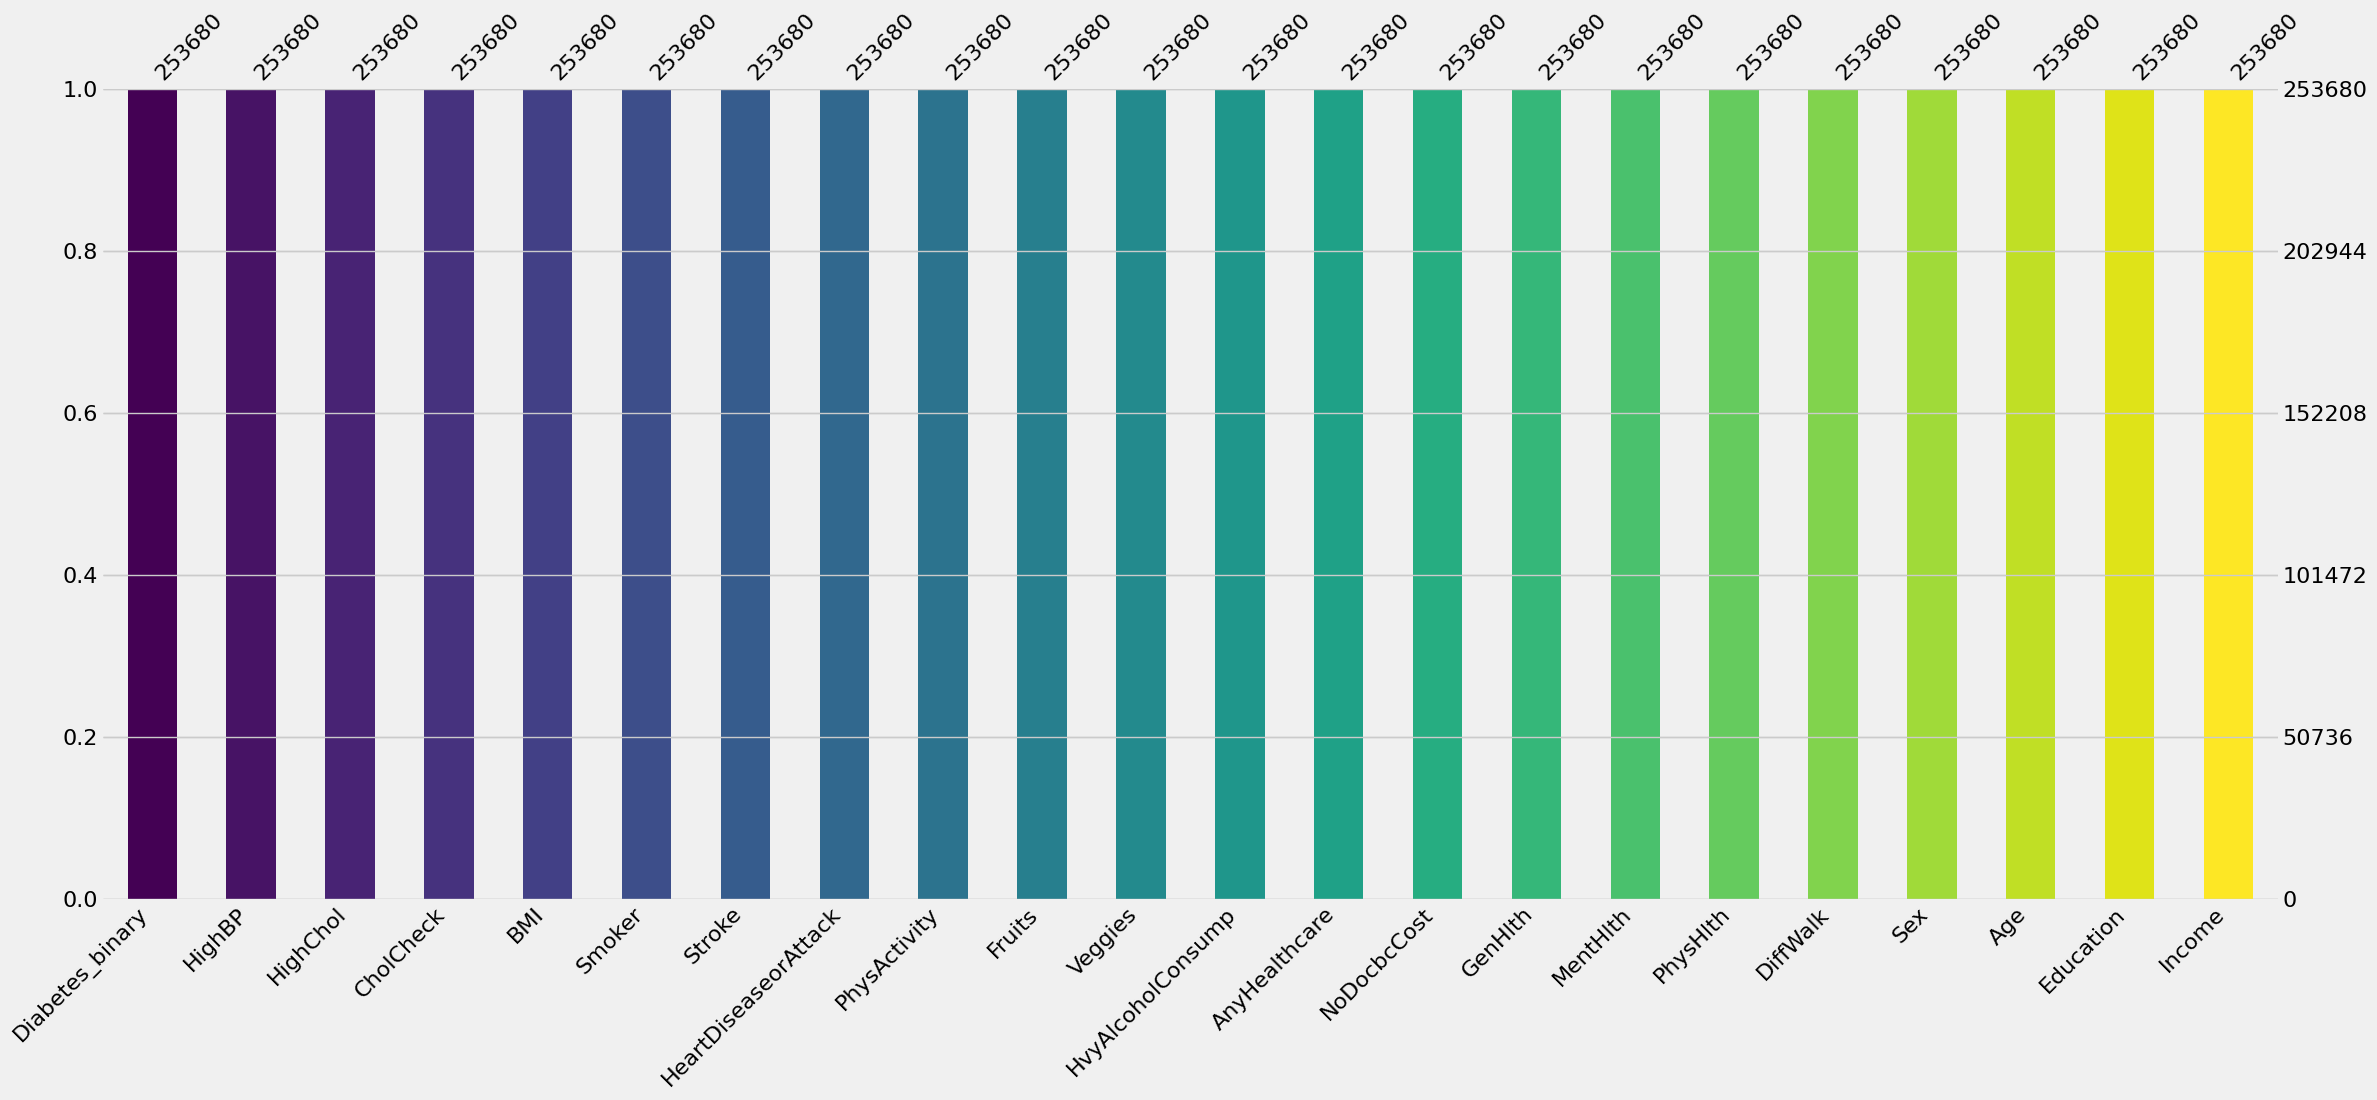

In [ ]:
import missingno as msno

num_columns = len(df.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))

msno.bar(df, color=colors)
plt.show()

## Check Relationship Among Features

In [ ]:
sns.pairplot(df, hue='Diabetes_binary', aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Check Data Distributions

In [ ]:
variabel_biner = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                  'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# Buat pie chart untuk setiap variabel biner
plt.figure(figsize=(15, 10))
for var in variabel_biner:
    plt.subplot(4, 4, variabel_biner.index(var) + 1)
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(var)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='GenHlth', y='Age', data=df)
plt.xlabel('General Health')
plt.ylabel('Age')
plt.title('Boxplot of General Health by Age')
plt.show()

plt.figure(figsize=(8, 6))
df['Education'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Bar Chart of Education Level')
plt.show()

plt.figure(figsize=(8, 6))
df['Income'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Bar Chart of income level')
plt.show()

**Normality Test**

In [ ]:
from scipy.stats import shapiro

# uji normalitas untuk variabel 'BMI'
stat, p = shapiro(df['BMI'])

print("Shapiro-Wilk Test for BMI:")
print("Test Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# uji normalitas untuk variabel 'Income'
stat, p = shapiro(df['Income'])

print("Shapiro-Wilk Test for Income:")
print("Test Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Conclusion : In the Shapiro-Wilk test for BMI and Income, the obtained p-value of 0.0 suggests strong evidence to reject the null hypothesis. This indicates that the BMI and Income data is not normally distributed.

## Check the Outliers

In [ ]:
cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()

Conclusion: There's no outlier in this data set

Check and Drop Duplicated Data

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

## Transform the Data into Integer

In [ ]:
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int)
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [ ]:
df.info()

# Exploratory Data Analysis

## Univariat Analysis

In [ ]:
df.hist(figsize = (20,20))
plt.show()

**To Show the Categorical Variable**

In [ ]:
df_2 = df.copy()

In [ ]:
df_2.Age[df_2['Age'] == 1] = '18 to 24'
df_2.Age[df_2['Age'] == 2] = '25 to 29'
df_2.Age[df_2['Age'] == 3] = '30 to 34'
df_2.Age[df_2['Age'] == 4] = '35 to 39'
df_2.Age[df_2['Age'] == 5] = '40 to 44'
df_2.Age[df_2['Age'] == 6] = '45 to 49'
df_2.Age[df_2['Age'] == 7] = '50 to 54'
df_2.Age[df_2['Age'] == 8] = '55 to 59'
df_2.Age[df_2['Age'] == 9] = '60 to 64'
df_2.Age[df_2['Age'] == 10] = '65 to 69'
df_2.Age[df_2['Age'] == 11] = '70 to 74'
df_2.Age[df_2['Age'] == 12] = '75 to 79'
df_2.Age[df_2['Age'] == 13] = '80 or older'

df_2.Diabetes_binary[df_2['Diabetes_binary'] == 0] = 'No Diabetes'
df_2.Diabetes_binary[df_2['Diabetes_binary'] == 1] = 'Diabetes'

df_2.HighBP[df_2['HighBP'] == 0] = 'No High'
df_2.HighBP[df_2['HighBP'] == 1] = 'High BP'

df_2.HighChol[df_2['HighChol'] == 0] = 'No High Cholesterol'
df_2.HighChol[df_2['HighChol'] == 1] = 'High Cholesterol'

df_2.CholCheck[df_2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_2.CholCheck[df_2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_2.Smoker[df_2['Smoker'] == 0] = 'No'
df_2.Smoker[df_2['Smoker'] == 1] = 'Yes'

df_2.Stroke[df_2['Stroke'] == 0] = 'No'
df_2.Stroke[df_2['Stroke'] == 1] = 'Yes'

df_2.HeartDiseaseorAttack[df_2['HeartDiseaseorAttack'] == 0] = 'No'
df_2.HeartDiseaseorAttack[df_2['HeartDiseaseorAttack'] == 1] = 'Yes'

df_2.PhysActivity[df_2['PhysActivity'] == 0] = 'No'
df_2.PhysActivity[df_2['PhysActivity'] == 1] = 'Yes'

df_2.Fruits[df_2['Fruits'] == 0] = 'No'
df_2.Fruits[df_2['Fruits'] == 1] = 'Yes'

df_2.Veggies[df_2['Veggies'] == 0] = 'No'
df_2.Veggies[df_2['Veggies'] == 1] = 'Yes'

df_2.HvyAlcoholConsump[df_2['HvyAlcoholConsump'] == 0] = 'No'
df_2.HvyAlcoholConsump[df_2['HvyAlcoholConsump'] == 1] = 'Yes'

df_2.AnyHealthcare[df_2['AnyHealthcare'] == 0] = 'No'
df_2.AnyHealthcare[df_2['AnyHealthcare'] == 1] = 'Yes'

df_2.NoDocbcCost[df_2['NoDocbcCost'] == 0] = 'No'
df_2.NoDocbcCost[df_2['NoDocbcCost'] == 1] = 'Yes'

df_2.GenHlth[df_2['GenHlth'] == 5] = 'Excellent'
df_2.GenHlth[df_2['GenHlth'] == 4] = 'Very Good'
df_2.GenHlth[df_2['GenHlth'] == 3] = 'Good'
df_2.GenHlth[df_2['GenHlth'] == 2] = 'Fair'
df_2.GenHlth[df_2['GenHlth'] == 1] = 'Poor'

df_2.DiffWalk[df_2['DiffWalk'] == 0] = 'No'
df_2.DiffWalk[df_2['DiffWalk'] == 1] = 'Yes'

df_2.Sex[df_2['Sex'] == 0] = 'Female'
df_2.Sex[df_2['Sex'] == 1] = 'Male'

df_2.Education[df_2['Education'] == 1] = 'Never Attended School'
df_2.Education[df_2['Education'] == 2] = 'Elementary'
df_2.Education[df_2['Education'] == 3] = 'Junior High School'
df_2.Education[df_2['Education'] == 4] = 'Senior High School'
df_2.Education[df_2['Education'] == 5] = 'Undergraduate Degree'
df_2.Education[df_2['Education'] == 6] = 'Magister'

df_2.Income[df_2['Income'] == 1] = 'Less Than $10,000'
df_2.Income[df_2['Income'] == 2] = 'Less Than $10,000'
df_2.Income[df_2['Income'] == 3] = 'Less Than $10,000'
df_2.Income[df_2['Income'] == 4] = 'Less Than $10,000'
df_2.Income[df_2['Income'] == 5] = 'Less Than $35,000'
df_2.Income[df_2['Income'] == 6] = 'Less Than $35,000'
df_2.Income[df_2['Income'] == 7] = 'Less Than $35,000'
df_2.Income[df_2['Income'] == 8] = '$75,000 or More'

In [ ]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

### Binary Variabels Proportion

In [ ]:
# List variabel biner
biner_vars = ['Diabetes_binary', 'Sex', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
              'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Membuat palet warna yang berbeda-beda untuk setiap pie chart
colors = sns.color_palette('Set2', n_colors=len(biner_vars))

# Mengatur ukuran visualisasi
plt.figure(figsize=(24, 20))

# Looping untuk membuat pie chart untuk setiap variabel biner
for i, var in enumerate(biner_vars, 1):
    plt.subplot(4, 4, i)
    biner_counts = df_2[var].value_counts()
    labels = biner_counts.index
    sizes = biner_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})  # Menggunakan warna dari palet dan menambahkan properti wedgeprops
    plt.title(f'Proportion of {var}')
    plt.axis('equal')  # Memastikan lingkaran terlihat bulat

plt.tight_layout()
plt.show()

### Categorical Variables Frecuency Distribution

In [ ]:
# Palet warna gradasi untuk 'Age', 'MentHlth', 'PhysHlth', dan 'Income'
gradasi_palette = sns.color_palette("viridis", n_colors=len(df_2['Age'].unique()))

# Palet warna berwarna untuk 'GenHlth' dan 'Education'
warna_berwarna = sns.color_palette("Set2")

# Mengatur ukuran visualisasi
plt.figure(figsize=(24, 16))

# Looping untuk membuat count plot untuk setiap variabel kategorial
for i, var in enumerate(['Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income'], 1):
    plt.subplot(3, 2, i)
    if var in ['Age', 'MentHlth', 'PhysHlth']:
        sns.countplot(x=var, data=df_2, palette=gradasi_palette, order=df_2[var].value_counts().index)
    else:
        sns.countplot(x=var, data=df_2, palette=warna_berwarna, order=df_2[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Mengkategorikan variabel BMI
df_2['BMI_Category'] = pd.cut(df_2['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Mengatur ukuran visualisasi
plt.figure(figsize=(8, 8))

# Menghitung jumlah data untuk setiap kategori BMI
bmi_category_counts = df_2['BMI_Category'].value_counts()

# Mengatur ukuran visualisasi
plt.figure(figsize=(12, 8))

# Menghitung jumlah data untuk setiap kategori BMI
bmi_category_counts = df_2['BMI_Category'].value_counts()

# Menyiapkan warna untuk histogram
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Membuat histogram untuk kategori BMI
bars = plt.bar(bmi_category_counts.index, bmi_category_counts.values, color=colors)

# Menambahkan label angka di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}\n({height / len(df_2) * 100:.1f}%)',
             ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

## Bivariat Analysis

**Heatmap Correlation**

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 'darkblue'), (0.25, 'navy'), (0.5, 'white'), (0.75, 'darkred') , (1, 'black')]
cmap = LinearSegmentedColormap.from_list('custom', colors)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title("Correlation of Features")
plt.show()

Conclusion:
Strong Correlation: (GenHlth, PhysHlth),
Moderate Corellation: (PhysHlth, DiffWalk), (GenHlth, DiffWalk), (PhysHlth, MentHlth), (Education, Income), (HighBP, Age) are moderately correleted with each other as positive relation meanwhile (GenHlth, Income), (DiffWalk, Income) are moderately correlated with each other as negative relation

### Diabetes Correlation Factors

**Pivot Table for Diabetes versus Another Binary Variables**

In [ ]:
def create_plot_pivot(df_2, x_column):

    _df_plot = df_2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df_2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

In [ ]:
df_2["Diabetes_binary"].value_counts()

Conclusion: The number of healthy people is bigger than people with diabetes

In [ ]:
labels=["non-Diabetic","Diabetic"]
plt.pie(df_2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

**Plot Relation with Age**

In [ ]:
pd.crosstab(df_2.Age,df_2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with Education**

In [ ]:
plt.figure(figsize=(10,6))

sns.distplot(df.Education[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation between Education and Diabetes")

plt.legend()

Conclusion: Most people have a high level of education, and those with higher levels of education tend to experience better overall health

**Plot Relation with Age**

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic
#Adding new column Diabetes_binary_

df["Diabetes_binary_"] = df["Diabetes_binary"].replace({"NonDiabetic" : 0, "Diabetic": 1})

# Convert data type into Integer
df["Diabetes_binary_"] = df["Diabetes_binary_"].astype(int)

In [ ]:
sns.boxplot(x='Diabetes_binary_', y='Age', data=df)
plt.title('Age vs Diabetes_binary_')
plt.show()

Conclusion: As the age increases, the chances of diabetes also commonly increases

**Plot Relation with Income**

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(data=df, x="Income", hue="Diabetes_binary_", kind="kde")
plt.title("Relation between Income and Diabetes")
plt.show()

Conclusion: The higher the income, the healthier people become

**Plot Relation with  Mental Health**

In [ ]:
pd.crosstab(df.MentHlth,df.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['purple', 'pink' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with physical Health**




In [ ]:
pd.crosstab(df.PhysHlth,df.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['Cyan', 'Yellow' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with GenHealth**

In [ ]:
pd.crosstab(df.GenHlth,df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'pink' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease/Attack Correlation Factors

**Pivot Table for Hearth Disease/Attack versus Another Binary Variables**


In [ ]:
def create_plot_pivot_heart_disease(df_2, x_column):
    _df_plot = df_2.groupby([x_column, 'HeartDiseaseorAttack']).size() \
        .reset_index().pivot(columns='HeartDiseaseorAttack', index=x_column, values=0)
    return _df_plot

# Mengatur ukuran visualisasi
fig, ax = plt.subplots(3, 4, figsize=(25, 25))
axe = ax.ravel()

# Mendefinisikan variabel biner yang akan dianalisis
biner_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'Stroke', 'PhysActivity', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Melakukan plotting untuk setiap variabel biner terhadap Heart Disease
for i in range(len(biner_vars)):
    plot_data = create_plot_pivot_heart_disease(df_2, biner_vars[i])
    # Membuat plot dengan urutan tumpukan yang memperlihatkan data minoritas di bagian bawah grafik
    plot_data.iloc[:, ::-1].plot(kind='bar', stacked=True, ax=axe[i])  # Mem-balik urutan tumpukan
    axe[i].set_xlabel(biner_vars[i])
    axe[i].set_title(f'Correlation with {biner_vars[i]}')
    axe[i].legend(['Heart Disease/Attack', 'No Heart Disease/Attack'], loc='upper right')  # Membalik urutan legenda

fig.tight_layout()
plt.show()

In [ ]:
df_2["HeartDiseaseorAttack"].value_counts()

### Stroke Correlation Factor

**Pivot Table for Stroke versus Another Binary Variables**

In [ ]:
def create_plot_pivot_stroke(df_2, x_column):
    _df_plot = df_2.groupby([x_column, 'Stroke']).size() \
        .reset_index().pivot(columns='Stroke', index=x_column, values=0)
    return _df_plot

# Mengatur ukuran visualisasi
fig, ax = plt.subplots(3, 4, figsize=(25, 25))
axe = ax.ravel()

# Mendefinisikan variabel biner yang akan dianalisis
biner_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Melakukan plotting untuk setiap variabel biner terhadap Stroke
for i in range(len(biner_vars)):
    plot_data = create_plot_pivot_stroke(df_2, biner_vars[i])
    # Membuat plot dengan urutan tumpukan yang memperlihatkan data minoritas di bagian bawah grafik
    plot_data.iloc[:, ::-1].plot(kind='bar', stacked=True, ax=axe[i])  # Mem-balik urutan tumpukan
    axe[i].set_xlabel(biner_vars[i])
    axe[i].set_title(f'Correlation with {biner_vars[i]}')
    axe[i].legend(['Stroke', 'No Stroke'], loc='upper right')  # Membalik urutan legenda

fig.tight_layout()
plt.show()

In [ ]:
df_2["Stroke"].value_counts()

In [ ]:
labels=["non-Stroke","Stroke"]
plt.pie(df_2["Stroke"].value_counts() , labels =labels,autopct='%.02f' );